## 1. Classification with logistic regression: 로지스틱 회귀분석을 사용한 분류

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
%matplotlib inline

### 1.1. Read in data and explore:

In [2]:
# Load data.
data = load_breast_cancer()  #유방암 데이터

In [3]:
# Display the description.
print(data.DESCR)           #569케이스

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [4]:
#설명변수
X = data['data']
print(data['feature_names'])  #변수이름 가져옴

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [5]:
X.shape

(569, 30)

In [6]:
#반응변수
Y = 1 - data['target']              #(1-파라미터)해서 0은 양성, 1은 악성으로 레이블 바꿈
label = list(data['target_names'])  
label.reverse()
print(label)

['benign', 'malignant']


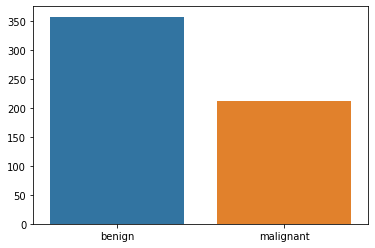

In [7]:
#도수분포표
ser = pd.Series(Y)
table = ser.value_counts()
table = table.sort_index()                  # Has to be sorted for correct labeling.
sns.barplot(label,table.values)
plt.show()

### 1.2. Train and test:

In [8]:
#데이터세트를 train과 test로 쪼갬
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4, random_state=1234)

In [9]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(341, 30)
(228, 30)
(341,)
(228,)


In [10]:
# Train and predict.
LL = LogisticRegression(solver='liblinear',max_iter=200)    #객체만듬(식은 복붙), 최대반복 200회
LL.fit(X_train,Y_train)   
Y_pred_test = LL.predict(X_test)                            #Out-of-sample prediction. 


In [11]:
# 혼동행렬
conf_mat = metrics.confusion_matrix(Y_test,Y_pred_test)  #실제 Y_test(행)와 예측된 Y_pred_test(열)로 혼동행렬 구함

print(conf_mat)

#행이 실제, 열이 예측(강의자료와 다름-내가 수정가능)
#대각선값이 크다

[[139   5]
 [ 12  72]]


In [12]:
#혼동행렬 사용해 정확도,민간도,특이도,정밀도 구함
accuracy = (conf_mat[0,0] + conf_mat[1,1])/np.sum(conf_mat)  #정확도는 함수적용
sensitivity = conf_mat[1,1]/(conf_mat[1,0]+conf_mat[1,1])    #나머지는 수식적용
specificity = conf_mat[0,0]/(conf_mat[0,0]+conf_mat[0,1])
precision = conf_mat[1,1]/(conf_mat[0,1]+conf_mat[1,1])
print('Accuracy    = {}'.format(np.round(accuracy,3)))
print('Sensitvity  = {}'.format(np.round(sensitivity,3)))
print('Specificity = {}'.format(np.round(specificity,3)))
print('Precision   = {}'.format(np.round(precision,3)))

Accuracy    = 0.925
Sensitvity  = 0.857
Specificity = 0.965
Precision   = 0.935


In [13]:
#혼동행렬 사용해 정확도,민간도,특이도,정밀도 구함(함수사용한 방법)  
accuracy = metrics.accuracy_score(Y_test,Y_pred_test)                   
sensitivity = metrics.recall_score(Y_test,Y_pred_test)   #민감도 recall이라고도 부름
precision = metrics.precision_score(Y_test,Y_pred_test)  
print('Accuracy    = {}'.format(np.round(accuracy,3)))
print('Sensitvity  = {}'.format(np.round(sensitivity,3)))
print('Precision   = {}'.format(np.round(precision,3)))

Accuracy    = 0.925
Sensitvity  = 0.857
Precision   = 0.935


### 1.3. Cutoff (threshold): 기준확률


어느 기준점(cutoff 기준확률)을 두고 확률이 높으면 1, 높지 않으면 0으로 예측<br><br>


기준확률은 얼마? 0.5

기준확률 높이면?

시험평가하는데 커트라인이 높아진다 = 더 높은 실력이 있어야 패스

=>더 명확해야 1이 된다<br><br>

상황에따라 기준을 높일 때도 낮을 때도 있다

In [14]:
# Now, predict the probability of Y  = 1.
Y_pred_test_prob=LL.predict_proba(X_test)[:,1]

#위에서 기준확률이 0.5(디폴트)로 되있는걸 변경
#predict_proba: 0이 될 확률, 1이 될 확률 2가지 계산

In [23]:
Y_pred_test_prob   #0이 될 확률, 1이 될 확률

array([8.21347377e-02, 1.17182084e-04, 4.04323911e-02, 2.10904481e-02,
       2.18919726e-03, 5.12417644e-03, 9.18728843e-01, 2.05657204e-03,
       1.00000000e+00, 9.99979706e-01, 9.99999999e-01, 2.82284040e-02,
       4.89448988e-03, 4.72467601e-02, 2.79814530e-03, 9.99999999e-01,
       3.06760173e-04, 2.86495913e-03, 8.84455948e-04, 9.99993576e-01,
       4.86609042e-03, 9.90292759e-01, 9.99999999e-01, 1.00000000e+00,
       9.99999993e-01, 3.43673518e-01, 9.96928125e-01, 2.46519081e-03,
       1.90880776e-03, 2.30313610e-03, 1.21292850e-02, 1.17889082e-03,
       9.98581998e-01, 1.45728611e-02, 8.27375382e-02, 1.53303307e-02,
       1.17610859e-02, 9.85923236e-01, 8.67743957e-01, 1.58522505e-03,
       9.99952668e-01, 1.27282158e-02, 1.00000000e+00, 1.97204280e-01,
       9.19342162e-02, 2.89305364e-03, 3.24233858e-03, 1.33773046e-01,
       1.00000000e+00, 9.59058354e-02, 5.18901974e-02, 9.20024083e-03,
       3.17127212e-03, 9.99999974e-01, 4.99096340e-01, 4.01968951e-04,
      

In [15]:
#기준확률 0.7로 변경 (0~1)
cutoff = 0.7                           
Y_pred_test_val = (Y_pred_test_prob > cutoff).astype(int)   #기준확률이 0.7 이상이면 1로, 아니면 0으로
conf_mat = metrics.confusion_matrix(Y_test,Y_pred_test_val)
print(conf_mat)

[[143   1]
 [ 13  71]]


In [16]:
accuracy = (conf_mat[0,0] + conf_mat[1,1])/np.sum(conf_mat)
sensitivity = conf_mat[1,1]/(conf_mat[1,0]+conf_mat[1,1])
specificity = conf_mat[0,0]/(conf_mat[0,0]+conf_mat[0,1])
precision = conf_mat[1,1]/(conf_mat[0,1]+conf_mat[1,1])
print('Accuracy    = {}'.format(np.round(accuracy,3)))
print('Sensitvity  = {}'.format(np.round(sensitivity,3)))
print('Specificity = {}'.format(np.round(specificity,3)))
print('Precision   = {}'.format(np.round(precision,3)))

#기준확률 올리니 좀 향상되거나 떨어짐

Accuracy    = 0.939
Sensitvity  = 0.845
Specificity = 0.993
Precision   = 0.986


### 1.4. ROC curve: 

In [17]:
# Initialize.
cutoff_grid = np.linspace(0.0,1.0,100)
TPR = []         #세로                                     # True Positive Rate.
FPR = []         #가로                                     # False Positive Rate.

In [18]:
# Populate the TP and FP lists.
for cutoff in cutoff_grid:
    Y_pred_test_val = (Y_pred_test_prob > cutoff).astype(int)     #기준확률을 0~1로 다시 배열(100개) 
    conf_mat = metrics.confusion_matrix(Y_test,Y_pred_test_val)   #혼동행렬 다시 계산하고
    sensitivity = conf_mat[1,1]/(conf_mat[1,0]+conf_mat[1,1])     #평가척도 다시 계산
    specificity = conf_mat[0,0]/(conf_mat[0,0]+conf_mat[0,1])
    TPR.append(sensitivity)
    FPR.append(1-specificity)                 

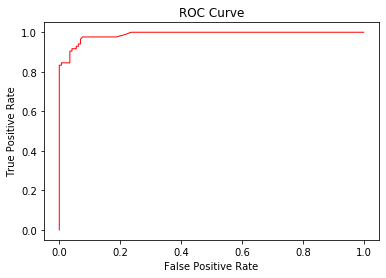

In [19]:
#위에서만들어진 리스트를 가지고 시각화
plt.plot(FPR,TPR,c='red',linewidth=1.0)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

#왼쪽 상단에 가까울수록 좋음

### 5) ROC curve (sklearn): 함수사용

In [20]:
# Calculate the TPR and FPR using a Scikit Learn function.
FPR, TPR, cutoffs = metrics.roc_curve(Y_test,Y_pred_test_prob,pos_label=1)      # positive label = 1.

#metrics.roc_curve: roc 곡선함수

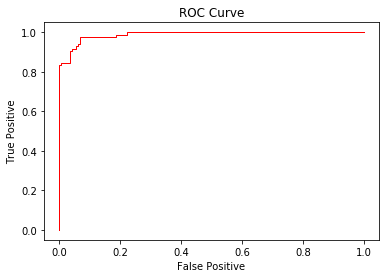

In [21]:
# Visualize.
plt.plot(FPR,TPR,c='red',linewidth=1.0)
plt.xlabel('False Positive')
plt.ylabel('True Positive')
plt.title('ROC Curve')
plt.show()

In [22]:
# AUC.
auc = metrics.roc_auc_score(Y_test,Y_pred_test_prob)
print('AUC  = {}'.format(np.round(auc,3)))

AUC  = 0.989
